In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Universities (1).csv")

In [3]:
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [5]:
df.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [6]:
df.isna()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


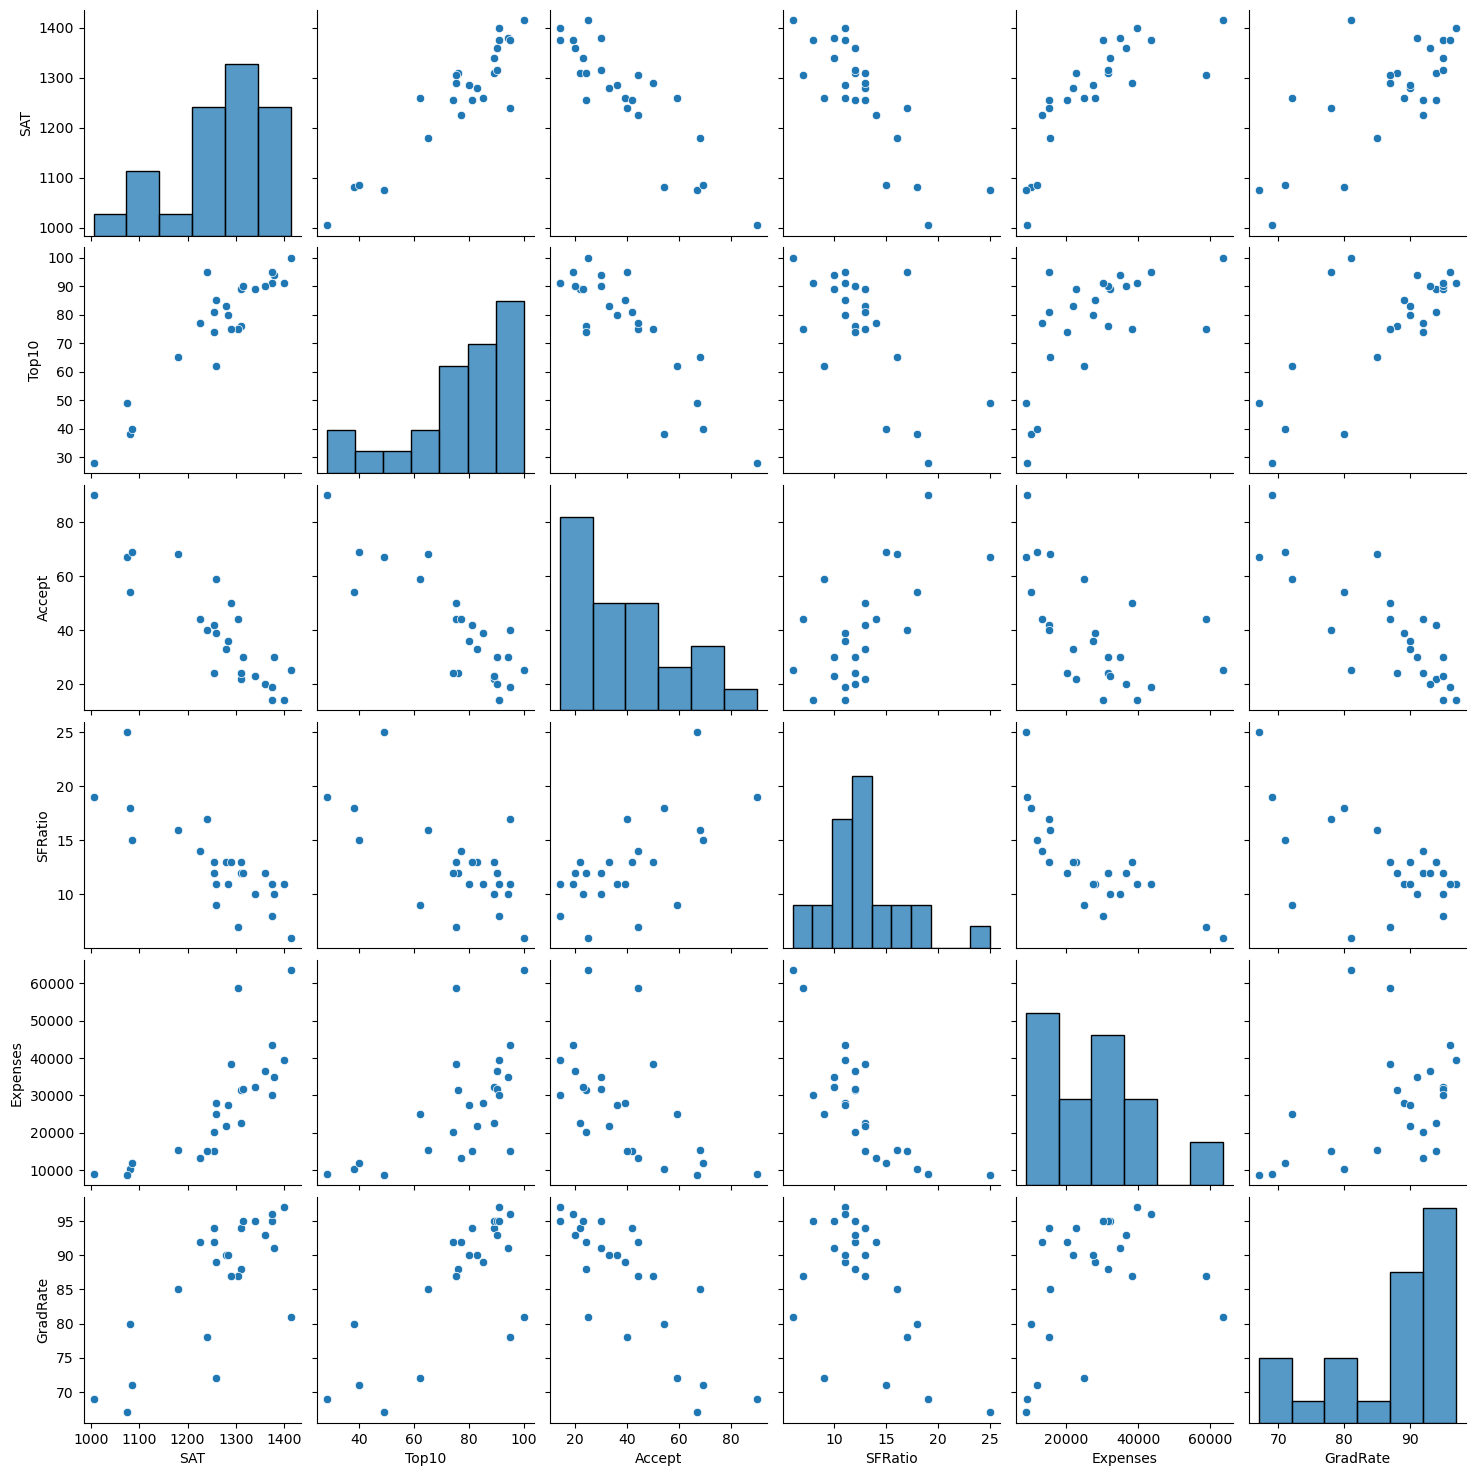

In [7]:
sns.pairplot(data=df)

In [8]:
sns.boxplot(data=df)

<AxesSubplot:>

In [9]:
s=df.copy()

In [10]:
s.drop("Expenses",axis=1,inplace=True)

In [11]:
sns.boxplot(data=s)

<AxesSubplot:>

In [12]:
from scipy.stats import skew
catcol=df.select_dtypes("int64")

SAT
-0.8928766081076304


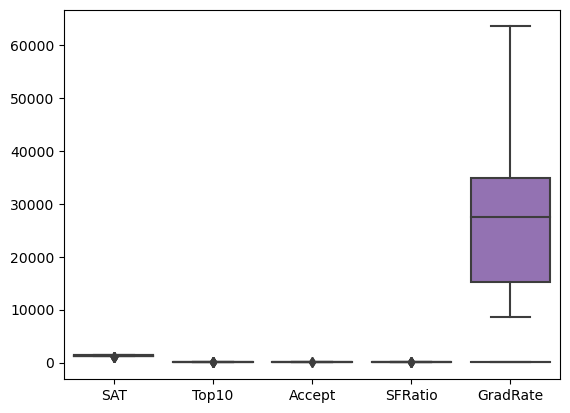

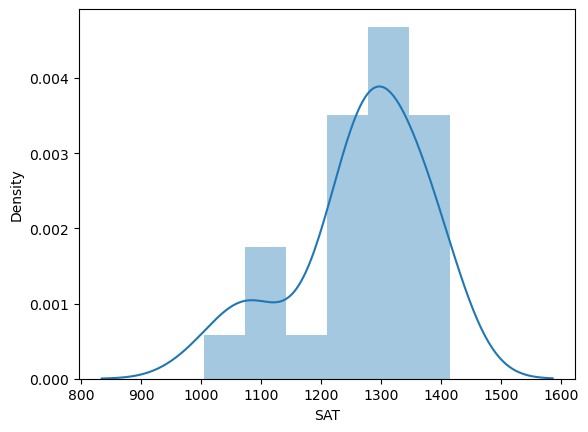

Top10
-1.1453157992392229


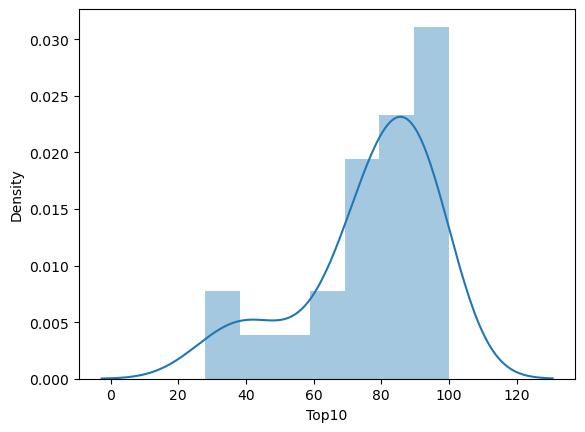

Accept
0.8145930638325511


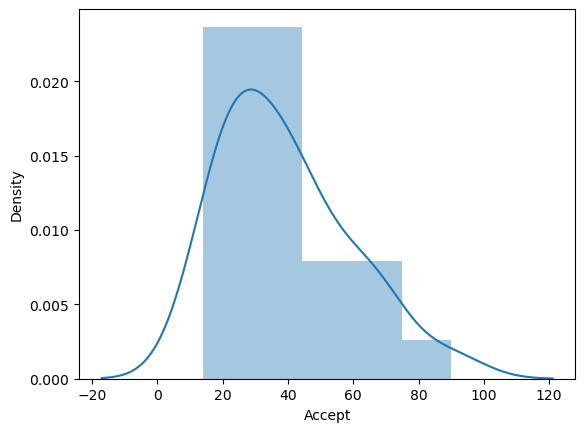

SFRatio
1.0523231507919937


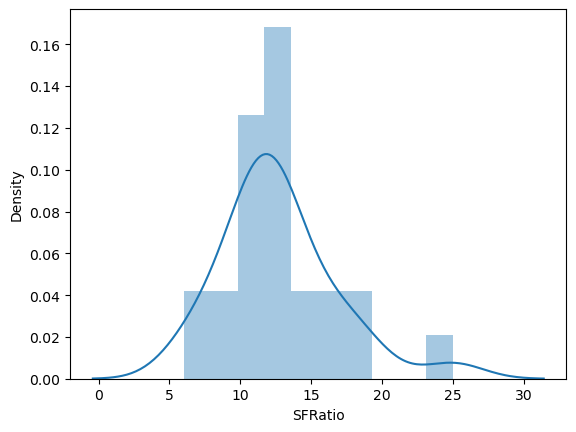

Expenses
0.8003316458276275


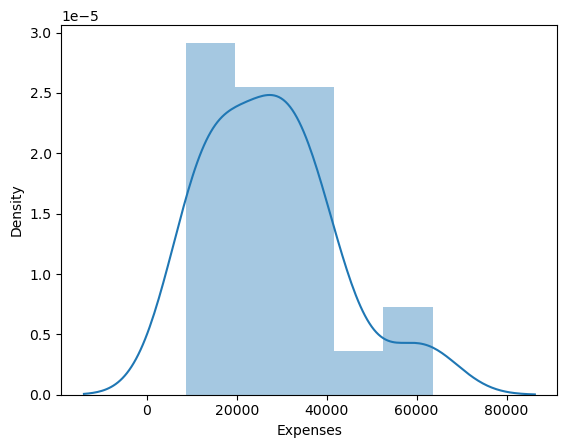

GradRate
-0.9385213617058671


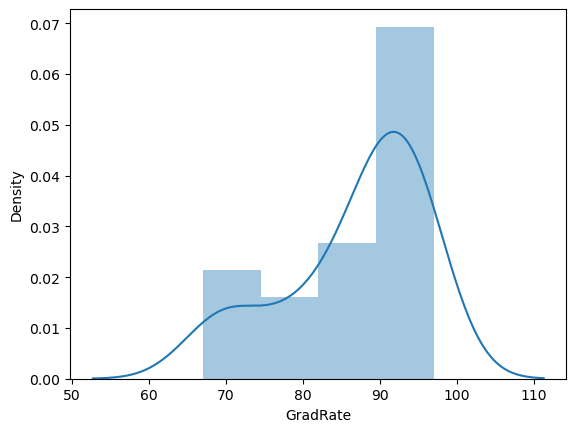

In [13]:
for i in catcol:
    print(i)
    print(skew(df[i]))
    plt.figure()
    sns.distplot(df[i])
    plt.show()

In [14]:
df["Accept"]=np.log(df["Accept"])
df["SFRatio"]=np.log(df["SFRatio"])
df["Expenses"]=np.log(df["Expenses"])

In [15]:
obj=df.select_dtypes("object").columns

In [16]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[obj]=oe.fit_transform(df[obj])

In [17]:
df.head(3)

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.0,1310,89,3.091042,2.564949,10.030296,94
1,2.0,1415,100,3.218876,1.791759,11.059976,81
2,1.0,1260,62,4.077537,2.197225,10.127671,72


In [18]:
siva=s.columns

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df=sc.fit_transform(df)
df=pd.DataFrame(df)

In [20]:
from scipy.cluster import hierarchy as hi
lk=hi.linkage(df,method="ward")
ddg=hi.dendrogram(lk)

In [21]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5)
ylabel = hc.fit_predict(df)

In [22]:
df["target"]=ylabel

In [23]:
x=df.iloc[:,:-1]
y=df["target"]

In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [25]:
def algorithm(algo):
    algo.fit(xtrain,ytrain)
    ypred=algo.predict(xtest)
    
    train=algo.score(xtrain,ytrain)
    test=algo.score(xtest,ytest)
    print(f"TrainingAccuracy: {train}\n Testin Accuracy: {test}\n\n")
    print(classification_report(ytest,ypred))
    return algo
from sklearn.metrics import classification_report

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB
from sklearn.svm import SVC

In [27]:
dt=algorithm(DecisionTreeClassifier())

TrainingAccuracy: 1.0
 Testin Accuracy: 0.6


              precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           2       0.50      1.00      0.67         1
           3       1.00      0.50      0.67         2
           4       0.00      0.00      0.00         1

    accuracy                           0.60         5
   macro avg       0.50      0.62      0.50         5
weighted avg       0.60      0.60      0.53         5



In [28]:
lr=algorithm(LogisticRegression())

TrainingAccuracy: 1.0
 Testin Accuracy: 1.0


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [29]:
bnb=algorithm(BernoulliNB())

TrainingAccuracy: 0.8
 Testin Accuracy: 0.8


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         2
           4       0.50      1.00      0.67         1

    accuracy                           0.80         5
   macro avg       0.62      0.75      0.67         5
weighted avg       0.70      0.80      0.73         5



In [30]:
gnb=algorithm(GaussianNB())

TrainingAccuracy: 1.0
 Testin Accuracy: 0.6


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00         1
           2       0.50      1.00      0.67         1
           3       1.00      0.50      0.67         2
           4       0.00      0.00      0.00         1

    accuracy                           0.60         5
   macro avg       0.50      0.50      0.47         5
weighted avg       0.70      0.60      0.60         5



In [31]:
s=algorithm(SVC())

TrainingAccuracy: 1.0
 Testin Accuracy: 1.0


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [32]:
kn=algorithm(KNeighborsClassifier())

TrainingAccuracy: 0.8
 Testin Accuracy: 0.6


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.33      1.00      0.50         1
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         1

    accuracy                           0.60         5
   macro avg       0.58      0.75      0.62         5
weighted avg       0.47      0.60      0.50         5

